In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
drugData_df=pd.merge(mouse_drug_df, clinical_trial_df, on='Mouse ID', how='inner')


# Display the data table for preview
print(drugData_df.head())

#verify no missing data from each column
print(drugData_df.count())


  Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2
Mouse ID              1906
Drug                  1906
Timepoint             1906
Tumor Volume (mm3)    1906
Metastatic Sites      1906
dtype: int64


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
meanTumorVolume=drugData_df.groupby(['Drug', 'Timepoint']).mean()
meanTumorVolume.head()

# Convert to DataFrame
meanTumorVolume=pd.DataFrame(meanTumorVolume)
meanTumorVolume=meanTumorVolume.reset_index()

# Preview DataFrame
meanTumorVolume=meanTumorVolume.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)',
                                                'Metastatic Sites':'Mean Metastatic Sites'
                                               })
meanTumorVolume.head()

,Drug,Timepoint,Mean Tumor Volume (mm3),Mean Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdError_drugData=drugData_df.groupby(['Drug', 'Timepoint']).sem()

# Convert to DataFrame
stdError_drugData=pd.DataFrame(stdError_drugData)
stdError_drugData=stdError_drugData.reset_index()

# Preview DataFrame
stdError_drugData=stdError_drugData.rename(columns={'Tumor Volume (mm3)': 'Std Tumor Volume (mm3)',
                                                'Metastatic Sites':'Std Metastatic Sites'
                                               })
stdError_drugData.head()


,Drug,Timepoint,Std Metastatic Sites,Mouse ID,Std Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
#I get an error if the cell is run without going through the whole notebook
#need to save dataframes as new variable

meanTumorVolume_reformat=meanTumorVolume.pivot(index="Timepoint", columns='Drug', values='Mean Tumor Volume (mm3)')
stddevTumorVolume_reformat=stdError_drugData.pivot(index='Timepoint', columns='Drug', values='Std Tumor Volume (mm3)')

#need to reset index so timepoint isn't the index and can be referenced for plotting
meanTumorVolume_reformat=meanTumorVolume_reformat.reset_index()
stddevTumorVolume_reformat=stddevTumorVolume_reformat.reset_index()

# Preview that Reformatting worked
print('Mean Tumor Volume reformatted Dataframe')
print(meanTumorVolume_reformat.head())
print("")
print('Stdev Tumor Volume reformatted Dataframe')
print(stddevTumorVolume_reformat.head())
meanTumorVolume_reformat.head()


Mean Tumor Volume reformatted Dataframe
Drug  Timepoint  Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol  \
0             0  45.000000  45.000000  45.000000  45.000000  45.000000   
1             5  44.266086  46.503051  47.062001  47.389175  46.796098   
2            10  43.084291  48.285125  49.403909  49.582269  48.694210   
3            15  42.064317  50.094055  51.296397  52.399974  50.933018   
4            20  40.716325  52.157049  53.197691  54.920935  53.644087   

Drug    Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
0     45.000000  45.000000  45.000000  45.000000  45.000000  
1     47.125589  47.248967  43.944859  47.527452  46.851818  
2     49.423329  49.101541  42.531957  49.463844  48.689881  
3     51.359742  51.067318  41.495061  51.529409  50.779059  
4     54.364417  53.346737  40.238325  54.067395  53.170334  

Stdev Tumor Volume reformatted Dataframe
Drug  Timepoint  Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
0             0   0.

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


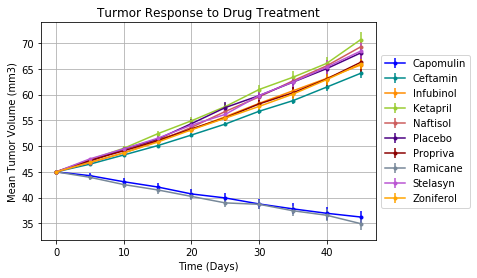

In [6]:
#create column list to reference for drugs
meanColumns=meanTumorVolume_reformat.columns
drugColumns=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
       'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

##have to use plt.errorbars for each drug to create the graph with unique error bars for each
#create a function that will plot each drug type with unique marker on graph

#for this approach, need to pull the Timepoint slot out of the dataframes

#first save my x-axis for the graph
x_axis=meanTumorVolume_reformat['Timepoint']  

#eliminate the Timepoint columne from each dataframe
graphMeanTumorVolume=meanTumorVolume_reformat.drop(columns=['Timepoint'])
graphStdTumorVolume=stddevTumorVolume_reformat.drop(columns=['Timepoint'])

#create an array for color markers in hex XXL format
colorArray=['#0000FF', '#008B8B', '#FF8C00','#9ACD32', '#CD5C5C','#4B0082', '#8B0000','#778899', '#BA55D3','#FFA500']

index=0
for i in drugColumns:
     y_data=graphMeanTumorVolume[i]
     stdev=graphStdTumorVolume[i]
     formatStr =colorArray[index]
     index=index+1
     plt.errorbar(x_axis, y_data, yerr=stdev, color=formatStr, marker='.')

plt.xlabel("Time (Days)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.grid()
plt.legend(drugColumns, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Turmor Response to Drug Treatment')

# Save the Figure
#need to use bbox input, otherwise legend is cropped
plt.savefig('meanTumorResponseGraph.png', bbox_inches="tight")

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
#reuse the mean dataframe created in the previous exercise.
#Change the pivot table to save the Metastatic data

meanMetastaticSites_reformat=meanTumorVolume.pivot(index="Timepoint", columns='Drug', values='Mean Metastatic Sites')
stddevMetastaticSites_reformat=stdError_drugData.pivot(index='Timepoint', columns='Drug', values='Std Metastatic Sites')

#need to reset index so timepoint isn't the index and can be referenced for plotting
meanMetastaticSites_reformat=meanMetastaticSites_reformat.reset_index()
stddevMetastaticSites_reformat=stddevMetastaticSites_reformat.reset_index()

# Preview that Reformatting worked
print(meanMetastaticSites_reformat.head())
print(stddevMetastaticSites_reformat.head())

Drug  Timepoint  Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
0             0   0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
1             5   0.160000  0.380952   0.280000  0.304348  0.260870  0.375000   
2            10   0.320000  0.600000   0.666667  0.590909  0.523810  0.833333   
3            15   0.375000  0.789474   0.904762  0.842105  0.857143  1.250000   
4            20   0.652174  1.111111   1.050000  1.210526  1.150000  1.526316   

Drug  Propriva  Ramicane  Stelasyn  Zoniferol  
0     0.000000  0.000000  0.000000   0.000000  
1     0.320000  0.120000  0.240000   0.166667  
2     0.565217  0.250000  0.478261   0.500000  
3     0.764706  0.333333  0.782609   0.809524  
4     1.000000  0.347826  0.952381   1.294118  
Drug  Timepoint  Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
0             0   0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
1             5   0.074833  0.108588   0.091652  0.098100  0.09

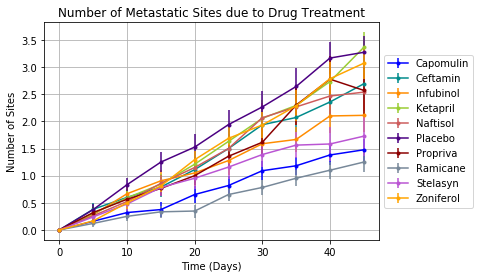

In [9]:
# Generate the Plot (with Error Bars)
#have to use plt.errorbars for each drug to create the graph with unique error bars for each
#create a function that will plot each drug type with unique marker on graph

#for this approach, need to pull the Timepoint slot out of the dataframes

#first save my x-axis for the graph
x_axis=meanMetastaticSites_reformat['Timepoint']  

#eliminate the Timepoint columne from each dataframe
graphmeanMetastatic=meanMetastaticSites_reformat.drop(columns=['Timepoint'])
graphStdMetastatic=stddevMetastaticSites_reformat.drop(columns=['Timepoint'])

#create an array for color markers in hex XXL format
colorArray=['#0000FF', '#008B8B', '#FF8C00','#9ACD32', '#CD5C5C','#4B0082', '#8B0000','#778899', '#BA55D3','#FFA500']

#create an array for each drug to graph
drugColumns=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
       'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

index=0
for i in drugColumns:
     y_data=graphmeanMetastatic[i]
     stdev=graphStdMetastatic[i]
     formatStr =colorArray[index]
     index=index+1
     plt.errorbar(x_axis, y_data, yerr=stdev, color=formatStr, marker='.')

plt.xlabel("Time (Days)")
plt.ylabel("Number of Sites")
plt.grid()
plt.legend(drugColumns, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Number of Metastatic Sites due to Drug Treatment')

# Save the Figure
#need to use bbox input, otherwise legend is cropped
plt.savefig('meanMetastaticStaticResponseGraph.png', bbox_inches="tight")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
#display the original dataframe again to help visualize
drugData_df.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MouseCount=drugData_df.groupby(['Drug', 'Timepoint']).count()

# Convert to DataFrame and clean up columns for Mean 
MouseSurvivalRate=pd.DataFrame(MouseCount)
MouseSurvivalRate=MouseSurvivalRate.reset_index()
MouseSurvivalRate=MouseSurvivalRate.drop(columns=['Tumor Volume (mm3)','Metastatic Sites'])
MouseSurvivalRate=MouseSurvivalRate.rename(columns={'Mouse ID' : 'Surviving Mice'})

#calculate the survival rate
#determine starting total number of mice. It is different for each drug treatment
#find number of mice treated with each drug at the begining of the study
MouseCount=MouseCount.reset_index()
TotalMice=MouseCount.loc[MouseCount['Timepoint']==0]

#clean up totalmice df and merge with Mouse Survival Rate
TotalMice=TotalMice.rename(columns={'Timepoint': "Initial Timepoint", 'Mouse ID':'Initial Mice'})
TotalMice=TotalMice.drop(columns=['Tumor Volume (mm3)','Metastatic Sites'])
MouseSurvivalRate=pd.merge(MouseSurvivalRate, TotalMice, on='Drug')

#calculat survial rate
MouseSurvivalRate['Survival Rate']=100*(MouseSurvivalRate['Surviving Mice']/MouseSurvivalRate['Initial Mice'])

# Preview DataFrame
MouseSurvivalRate.head()

,Drug,Timepoint,Surviving Mice,Initial Timepoint,Initial Mice,Survival Rate
0,Capomulin,0,25,0,25,100.0
1,Capomulin,5,25,0,25,100.0
2,Capomulin,10,25,0,25,100.0
3,Capomulin,15,24,0,25,96.0
4,Capomulin,20,23,0,25,92.0


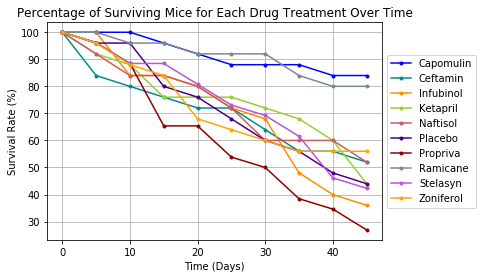

In [12]:
# Generate the Plot (Accounting for percentages)

#reformat the dataframe with survial rates
#reset index so timepoint can be dropped from dataframe
MouseSurvivalRate_reformat=MouseSurvivalRate.pivot(index="Timepoint", columns='Drug', values='Survival Rate')
MouseSurvivalRate_reformat=MouseSurvivalRate_reformat.reset_index()

#first save x-axis for the graph
x_axis=MouseSurvivalRate_reformat['Timepoint']  

#eliminate the Timepoint column from dataframe so it isn't graphed
graphMouseSurvivalRate=MouseSurvivalRate_reformat.drop(columns=['Timepoint'])

#create an array for color markers in hex XXL format
colorArray=['#0000FF', '#008B8B', '#FF8C00','#9ACD32', '#CD5C5C','#4B0082', '#8B0000','#778899', '#BA55D3','#FFA500']

#create an array for each drug to graph
drugColumns=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
       'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

#use a for loop to graph each drug of survival rate over time
index=0
for i in drugColumns:
        y_data=graphMouseSurvivalRate[i]
        formatStr =colorArray[index]
        index=index+1
        plt.errorbar(x_axis, y_data, color=formatStr, marker='.')

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
drugColumns=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
        'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.legend(drugColumns, loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Percentage of Surviving Mice for Each Drug Treatment Over Time')

# #Save the Figure
# #need to use bbox input, otherwise legend is cropped
plt.savefig('MouseSurvivalRate.png', bbox_inches="tight")

# #Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [13]:
#display dataframe that will be used for calculation
meanTumorVolume.head()

#create an empty dataframe to store initial and final tumor volume measurements
tumorSize=pd.DataFrame({'Drug':[]})

#add drug names to dataframe
drugColumns=['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
        'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
tumorSize['Drug']=drugColumns

#extract intital tumor volume from dataframe and add to tumorSize dataframe
startVolume=meanTumorVolume.loc[meanTumorVolume['Timepoint']==0]
startVolume=startVolume.rename(columns={'Mean Tumor Volume (mm3)':'Initial Volume'})
tumorSize=pd.merge(tumorSize, startVolume, on='Drug')

#extract final volume from dataframe and add to tumorSize dataframe
finalVolume=meanTumorVolume.loc[meanTumorVolume['Timepoint']==45]
finalVolume=finalVolume.rename(columns={'Mean Tumor Volume (mm3)':'Final Volume'})
tumorSize=pd.merge(tumorSize, finalVolume, on='Drug')

#clean up tumorSize dataframe
tumorSize=tumorSize.drop(columns=['Timepoint_x','Mean Metastatic Sites_x', 'Timepoint_y',
                                 'Mean Metastatic Sites_y'
                                 ])
# Calculate the percent changes for each drug
tumorSize["Percent Change"]=100*((tumorSize['Final Volume']-tumorSize['Initial Volume'])/tumorSize['Initial Volume'])


# Display the data to confirm
tumorSize.head()

,Drug,Initial Volume,Final Volume,Percent Change
0,Capomulin,45.0,36.236114,-19.475303
1,Ceftamin,45.0,64.132421,42.516492
2,Infubinol,45.0,65.755562,46.123472
3,Ketapril,45.0,70.662958,57.028795
4,Naftisol,45.0,69.265506,53.923347


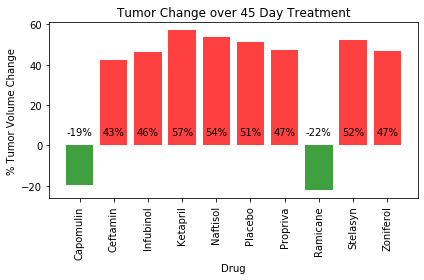

In [20]:
# Store all Relevant Percent Changes into a Tuple
percentChange=tumorSize['Percent Change']

drugLabels=tumorSize['Drug']

x_axis = np.arange(0, len(drugLabels))
tick_locations = []
tick_locations=[x for x in x_axis]

#Splice the data between passing and failing drugs
#create new colume to store if pass or fail
tumorSize.loc[tumorSize['Percent Change'] <0, 'Pass_Fail'] = 'Pass'
tumorSize.loc[tumorSize['Percent Change'] >=0, 'Pass_Fail'] = 'Fail'

#create a color column for bar plot depending on pass/fail 
tumorSize.loc[tumorSize['Pass_Fail'] =='Pass', 'Color'] = 'g'
tumorSize.loc[tumorSize['Pass_Fail'] =='Fail', 'Color'] = 'r'
colors=tumorSize['Color']

# Orient widths. Add labels, tick marks, etc. 
plt.bar(x_axis, percentChange, alpha=0.75, align="center", color=colors)
plt.xticks(tick_locations, drugLabels)
plt.title("Tumor Change over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.xticks(rotation=90)
plt.tight_layout()

#add percent change labels to each bar
#Create labels

# Text on the top of each barplot
#create an y position for the labels, creates a list
  
#plot the text labels        
for x,y in zip(x_axis,percentChange):

    label = "{:.0f}%".format(y)

    plt.annotate(label, # this is the text
                 (x,0), # this is the point to label
                 xytext=(0,10), # distance from text to points (x,y)
                 textcoords="offset points", # how to position the text
                 ha='center') # horizontal alignment can be left, right or center    

# Save the Figure
plt.savefig('TumorVolumePercentChange.png', bbox_inches="tight")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [ ]:
#Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations.

#1). I decided to look at all the drugs since, cuz why not?
#    When comparing all drug treatments against one another Capomulin 
#    and Ramicane were the most effective. This can be seen by the decreasing tumor volume
#    over time. The bar graph also demonstrates they were the only drugs to have a decrease
#    in percent change in turmor volume 

#2). The survival rate of mice was higher with the Capomulin as compared to the Ramicane.
#    However, the decrease in turmor volume and number of metatstatic sites were within 
#    error of each other. This implies one may not be more effective then the other. 
#    More studies are needed to see if one is more beneficial. 

#3). All other drugs performed similarly to the placebo within the standard error of the data.
#    This means none of the other drugs had any impact as compared to an untreated mouse. 
